# **CIFAR-10 Image Classification with Keras & TensorFlow**

**Dataset:** Keras Boston Housing dataset - http://www.cs.toronto.edu/~kriz/cifar.html

http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf - Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

**Code:** Simple MNIST convnet example - https://keras.io/examples/vision/mnist_convnet + Image classification from scratch https://keras.io/examples/vision/image_classification_from_scratch/

& Chapter 10 "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow"

### Classify images within 10 categories ###

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


## Get the data ##

### Dataset attributes:###

60000 32x32 colour images in 10 classes, with 6000 images per class.

Classes: airplane automobile bird cat deer dog frog horse ship truck

**data** -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

**label_names** -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.


In [3]:
num_classes = 10
input_shape = (32, 32, 3)

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
import os

DATASET_PATH = "cifar-10-batches-py"
LEN_BATCH = 10000 
LEN_IMAGE = 32 * 32 * 3

def load_cimf_data(file_name_prefix="data_batch_", no_batches=1):
    
    num_X = np.empty((LEN_BATCH * no_batches, LEN_IMAGE), dtype=np.int16)
    num_y = np.empty(LEN_BATCH * no_batches, dtype=np.int16)

    for i in range(1, no_batches+1):
        data_file = file_name_prefix
        if (no_batches > 1):  
            data_file = data_file + str(i)
        pickle_path = os.path.join(DATASET_PATH, data_file)
        dict = unpickle(pickle_path)
        
        for j in range(0, LEN_BATCH):
            for k in range (0, LEN_IMAGE):
                num_X[j + LEN_BATCH*(i-1), k] = dict[b'data'][j][k]
            num_y[j + LEN_BATCH*(i-1)] = int(dict[b'labels'][j])
                
    return num_X, num_y

In [6]:
X_train, y_train = load_cimf_data(no_batches=5)

In [7]:
X_train.shape

(50000, 3072)

In [8]:
X_test, y_test = load_cimf_data("test_batch")

In [9]:
X_test.shape

(10000, 3072)

In [10]:
def load_label_mapping():
    
    num_labels = np.empty(num_classes)
    
    pickle_path = os.path.join(DATASET_PATH, "batches.meta")
    dict = unpickle(pickle_path)
    
    num_labels = dict[b'label_names']
    
    return num_labels

In [11]:
label_mapping = load_label_mapping()

print(label_mapping[6].decode("utf-8"))

frog


## Data visualization

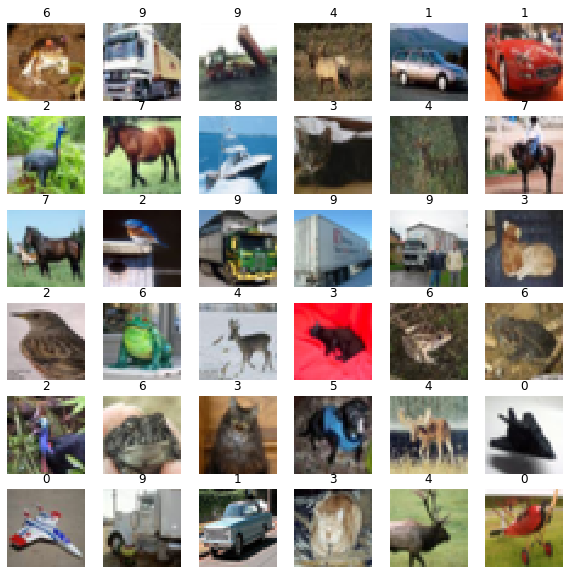

In [12]:
plt.figure(figsize=(10, 10))

for i in range(0, 36):
    label = y_train[i]
    image = X_train[i].reshape(3, 32, 32).transpose(1, 2, 0)

    ax = plt.subplot(6, 6, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

## Data preparation

In [13]:
# Scale images to the [0, 1] range
X_train_prep = X_train.astype("float32") / 255

## Model

In [14]:
X_train_prep = X_train_prep.reshape(50000, 3, 32, 32).transpose(0, 2, 3, 1)

In [15]:
# convert class vectors to binary class matrices
y_train_prep = keras.utils.to_categorical(y_train, num_classes)

In [16]:
simple_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [17]:
batch_size = 128
epochs = 25

simple_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = simple_model.fit(X_train_prep, y_train_prep, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 32s 714us/sample - loss: 1.7237 - accuracy: 0.3790 - val_loss: 1.4530 - val_accuracy: 0.4866
Epoch 2/25
45000/45000 [==============================] - 31s 696us/sample - loss: 1.3984 - accuracy: 0.5060 - val_loss: 1.2821 - val_accuracy: 0.5576
Epoch 3/25
45000/45000 [==============================] - 31s 699us/sample - loss: 1.2902 - accuracy: 0.5482 - val_loss: 1.1714 - val_accuracy: 0.5966
Epoch 4/25
45000/45000 [==============================] - 32s 708us/sample - loss: 1.2162 - accuracy: 0.5766 - val_loss: 1.1055 - val_accuracy: 0.6222
Epoch 5/25
45000/45000 [==============================] - 32s 701us/sample - loss: 1.1672 - accuracy: 0.5929 - val_loss: 1.0627 - val_accuracy: 0.6372
Epoch 6/25
45000/45000 [==============================] - 32s 715us/sample - loss: 1.1274 - accuracy: 0.6083 - val_loss: 1.0334 - val_accuracy: 0.6480
Epoch 7/25
45000/45000 [=====================

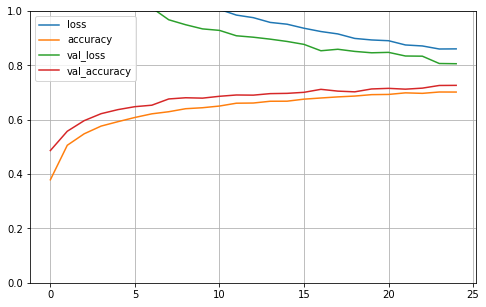

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Test the simple model:

In [19]:
# Scale images to the [0, 1] range
X_test_prep = X_test.astype("float32") / 255

In [20]:
# convert class vectors to binary class matrices
y_test_prep = keras.utils.to_categorical(y_test, num_classes)

In [21]:
X_test_prep = X_test_prep.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)

In [22]:
score = simple_model.evaluate(X_test_prep, y_test_prep, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8384319690704346
Test accuracy: 0.7135


In [23]:
X_new = X_test_prep[:9]
y_proba = simple_model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.75, 0.  , 0.16, 0.02, 0.  , 0.05, 0.01],
       [0.01, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.87, 0.  ],
       [0.08, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.02],
       [0.78, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  ],
       [0.  , 0.  , 0.01, 0.07, 0.13, 0.01, 0.77, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.05, 0.04, 0.03, 0.86, 0.01, 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
       [0.01, 0.  , 0.14, 0.05, 0.09, 0.01, 0.69, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.03, 0.76, 0.07, 0.08, 0.02, 0.03, 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = simple_model.predict_classes(X_new)
y_pred

array([3, 8, 8, 0, 6, 6, 1, 6, 3], dtype=int64)

In [25]:
np.array(label_mapping)[y_pred]

array([b'cat', b'ship', b'ship', b'airplane', b'frog', b'frog',
       b'automobile', b'frog', b'cat'], dtype='|S10')

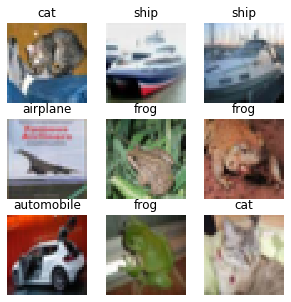

In [26]:
plt.figure(figsize=(5, 5))

for i in range(0, 9):
    label = (label_mapping[y_pred[i]]).decode("utf-8")
    image = X_test[i].reshape(3, 32, 32).transpose(1, 2, 0)

    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

## More complex model

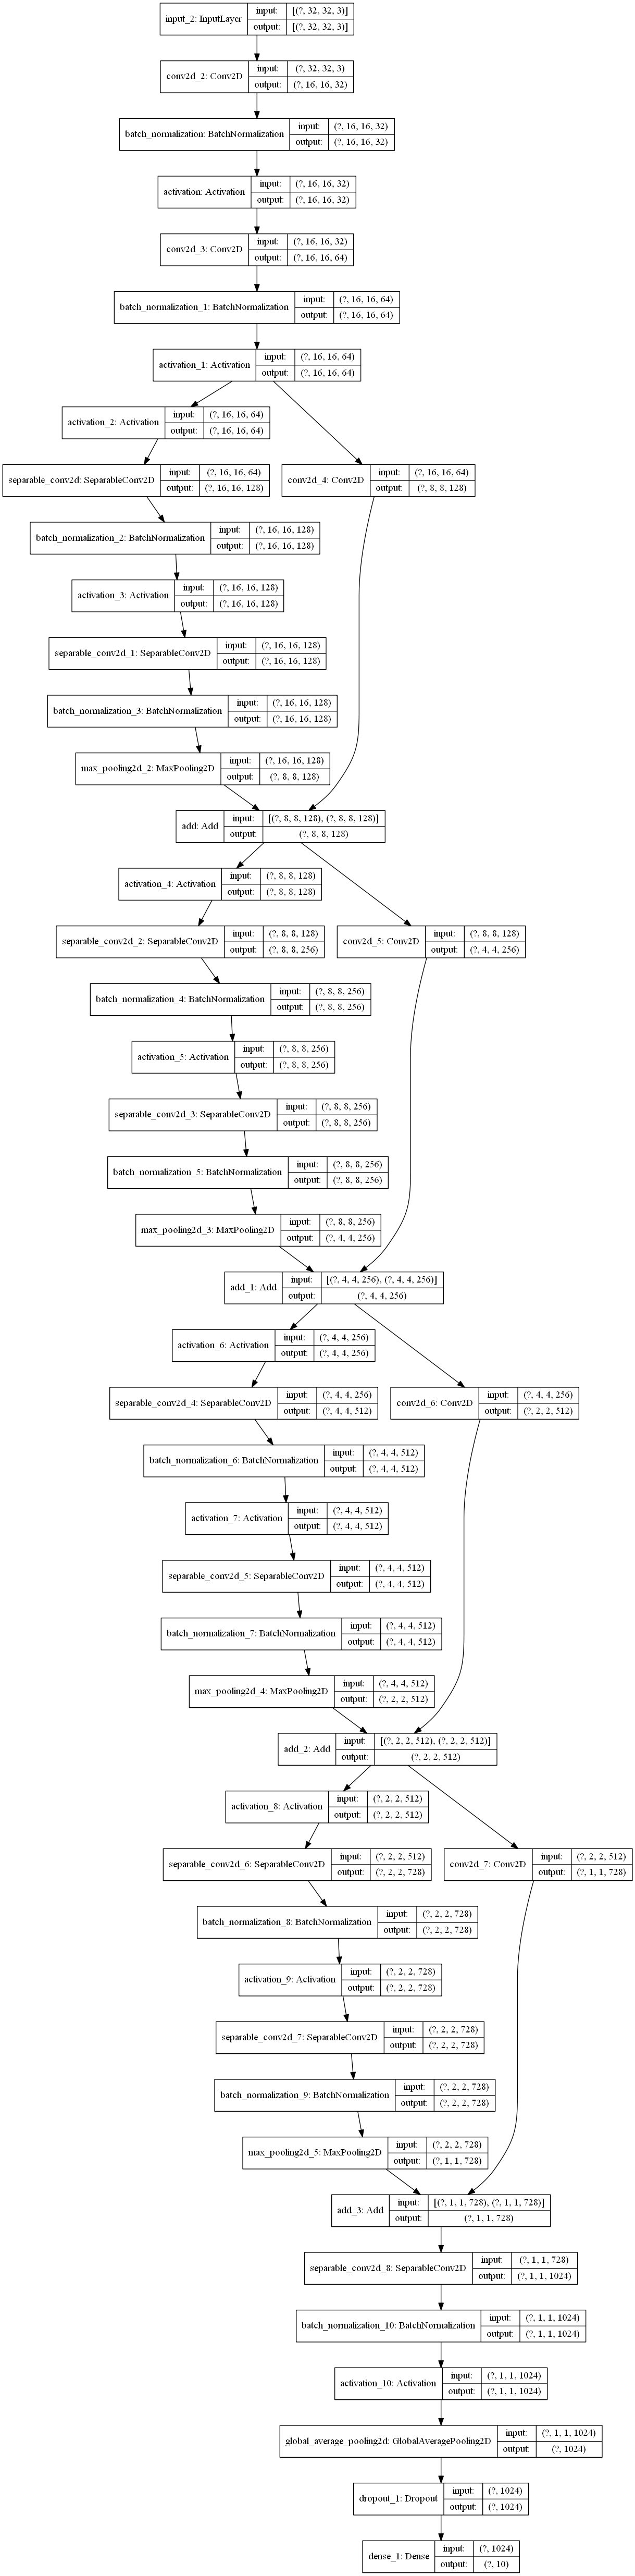

In [27]:
image_size = (32, 32)

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    ### x = data_augmentation(inputs)

    # Entry block
    ### x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=10)
keras.utils.plot_model(model, show_shapes=True)

In [29]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train_prep, y_train_prep, epochs=epochs, validation_split=0.1,  callbacks=callbacks,
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 354s 8ms/sample - loss: 1.4720 - accuracy: 0.4740 - val_loss: 1.9992 - val_accuracy: 0.4122
Epoch 2/20
45000/45000 [==============================] - 353s 8ms/sample - loss: 1.1082 - accuracy: 0.6121 - val_loss: 1.2061 - val_accuracy: 0.6036
Epoch 3/20
45000/45000 [==============================] - 353s 8ms/sample - loss: 0.9097 - accuracy: 0.6830 - val_loss: 1.0841 - val_accuracy: 0.6486
Epoch 4/20
45000/45000 [==============================] - 352s 8ms/sample - loss: 0.7778 - accuracy: 0.7297 - val_loss: 1.1656 - val_accuracy: 0.6156
Epoch 5/20
45000/45000 [==============================] - 355s 8ms/sample - loss: 0.6890 - accuracy: 0.7635 - val_loss: 1.0018 - val_accuracy: 0.6640
Epoch 6/20
45000/45000 [==============================] - 345s 8ms/sample - loss: 0.6027 - accuracy: 0.7913 - val_loss: 0.9267 - val_accuracy: 0.7168
Epoch 7/20
45000/45000 [===========================

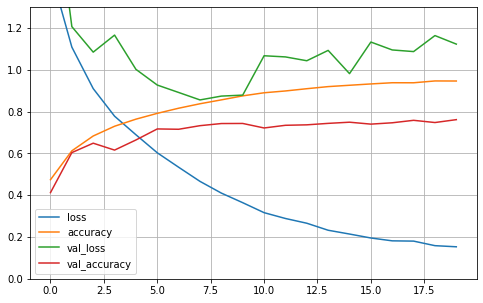

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.3)
plt.show()

In [32]:
score = model.evaluate(X_test_prep, y_test_prep, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.226292198061943
Test accuracy: 0.7455
